### estimating the dimension of fractal objects in an image
Box counting is a method to determine the fractal dimension of an object
in an image. For simplicity, let us focus on square images whose width and
height (in pixels) are an integer power of two, for instance
w = h = $2^L$ = 512
⇔
L = 9

Given such an image, the procedure involves three main steps:
1. apply an appropriate binarization procedure to create a binary image
in which foreground pixels are set to 1 and background pixels to 0

2. specify a set S of scaling factors 0 < $s_{i}$ < 1, for instance $$S = \{\frac{1}{2^i}\ |\ i ∈ \{1, 2, . . . , L − 2\} \}$$ and, for each $s_{i}$ ∈ S, cover the binary image with boxes of size $s_{i}w$ × $s_{i}h$ and count the number $n_{i}$ of boxes which contain at least one foreground pixel

3. plot $log\ n_{i}$ against $log\frac{1}{s_{i}}$ and fit a line<br>$D.log\frac{1}{s_{i}} + b = log\ n_{i}$

In other words, the problem of estimating D is a simple linear regression
problem that can of course be tackled using least squares.
Now, implement the box counting method and run it on the two test images
tree-2.png and lightning-3.png.
What fractal dimensions do you obtain? Which object has the higher one,
the tree or the lightning bolt?

In [1]:
# 5
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc as msc
import scipy.ndimage as img
from math import log2,pow
import seaborn as sns

# method for binarizing image
def foreground2BinImg(f):
    d = img.filters.gaussian_filter(f, sigma=0.50, mode="reflect") - \
    img.filters.gaussian_filter(f, sigma=1.00, mode="reflect")
    d = np.abs(d)
    m = d.max()
    d[d< 0.1*m] = 0
    d[d>=0.1*m] = 1
    return img.morphology.binary_closing(d)
    
    
# method for calculating fractal Dimension
def calFractalDimension(imgName):
    f = msc.imread(imgName+'.png', flatten=True).astype(np.float)
    g = foreground2BinImg(f)
    plt.imshow(f)
    plt.gca().set_title('Original image '+ imgName )

    plt.show()
    plt.imshow(g)
    plt.gca().set_title('Binarized image '+ imgName )

    plt.show()

    # height and width of the image
    h = g.shape[0]
    w = g.shape[1]
    
    L = log2(h)
    
    S = np.geomspace(1/2, 1/(pow(2,L-2)), L-2)
    
    N = np.empty_like(S)
    
    #defining differnt block sizes to iterate from
    blocksizes = S*w

    for k,s in enumerate(blocksizes):
        count = 0
        # moving the filter horizontally
        for i in range(int(h/s)):
            # moving the filter vertically
            for j in range(int(w/s)):
                block = g[int(s*i):int(s*(i+1)), int(s*j):int(s*(j+1))]
                countOnes = block.sum()
                if countOnes > 0:
                    count = count + 1
        N[k] = count
    
    # Calculating values for the plot
    S_invers = 1/S
    logSinvers = np.log2(S_invers)
    logN = np.log2(N)
    
    ax = sns.regplot(x = logSinvers,y=logN,fit_reg=True)
    plt.show()
    p = np.polyfit(logSinvers, logN, deg=1)
    print("Fractal Dimension for {}.png = {}".format(imgName,p[0]))
    
    
                
                

/home/aakash/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


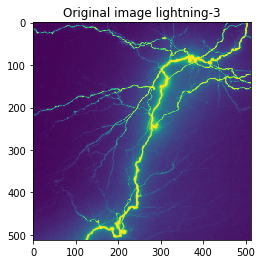

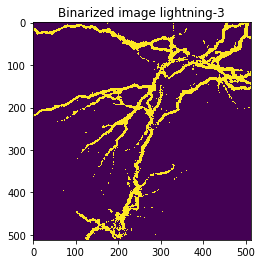

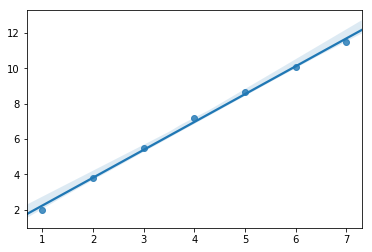

Fractal Dimension for lightning-3.png = 1.5769128546352438


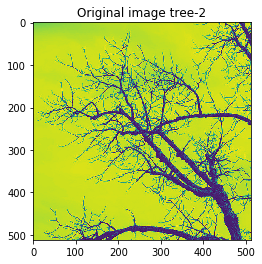

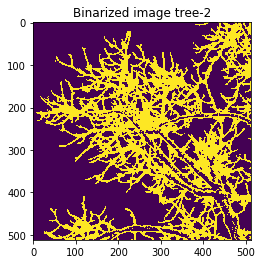

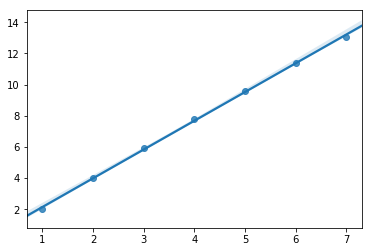

Fractal Dimension for tree-2.png = 1.845162087187023


In [2]:
calFractalDimension('lightning-3')
calFractalDimension('tree-2')